# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Read the dataset

In [2]:
data = pd.read_csv("C:\\Users\\Admin\\Downloads\\IRIS.csv")


# Display the first few rows of the dataset

In [3]:
data.head()

data.isnull().sum()

data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Prepare the data for modeling

In [4]:
x = data.drop("species", axis=1)
y = data["species"]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the K-Nearest Neighbors (KNN) classifier

In [5]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Make predictions using the trained model

In [6]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
y_pred = knn.predict(X_test)

# Display the confusion matrix

In [7]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Display the classification report

In [8]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# Define colors for different classes

In [9]:
class_to_color = {
    'Iris-setosa': 'green',
    'Iris-versicolor': 'blue',
    'Iris-virginica': 'orange'
}

default_color = 'gray'

# Create a scatter plot with color-coded points

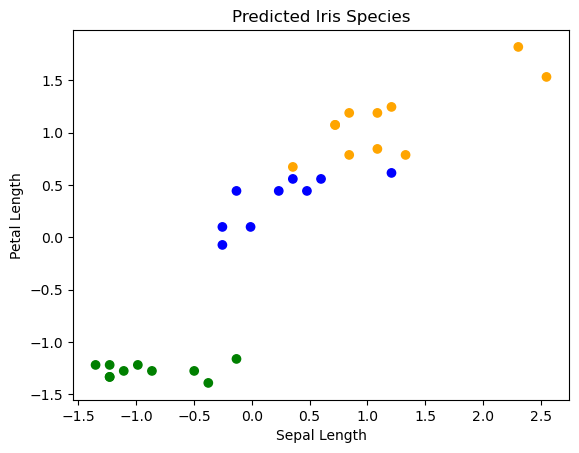

In [10]:
colors = [class_to_color.get(label, default_color) for label in y_pred]

plt.scatter(X_test[:, 0], X_test[:, 2], c=colors)
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")

plt.title("Predicted Iris Species")
plt.show()